In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from keras.models import Sequential
from keras.layers import Dense, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
import pmdarima as pm
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv(r"archive\Electric_Production.csv")
data = data.dropna()
data['Value'] = data['Value'].astype(float)  # Ensure numeric data

In [3]:
# Train-test split
data_len = len(data)
train_size = int(data_len * 0.8)
train, test = data['Value'][:train_size], data['Value'][train_size:]


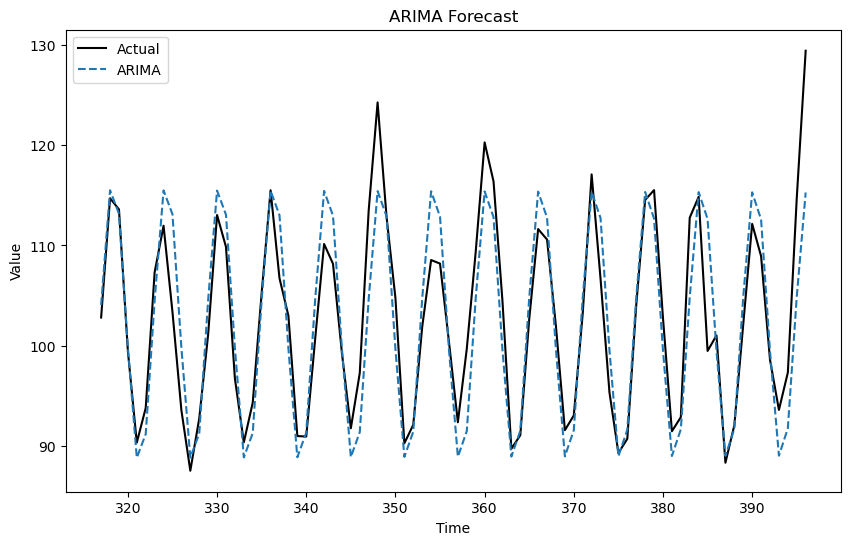

In [29]:
# 1. ARIMA
model_arima = ARIMA(train, order=(2, 1, 4))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=len(test))

# Plot ARIMA results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_arima, label='ARIMA', linestyle='--')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

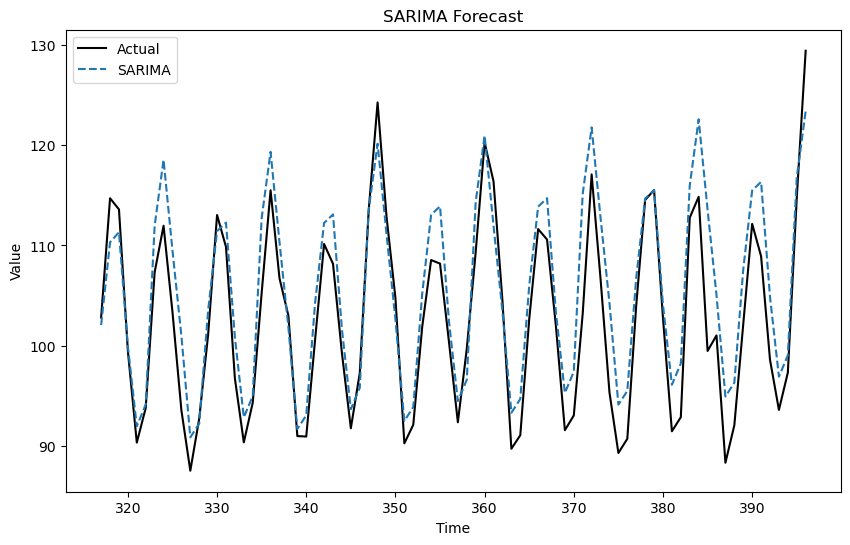

In [5]:
# 2. SARIMA
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.forecast(steps=len(test))

# Plot SARIMA results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_sarima, label='SARIMA', linestyle='--')
plt.legend()
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

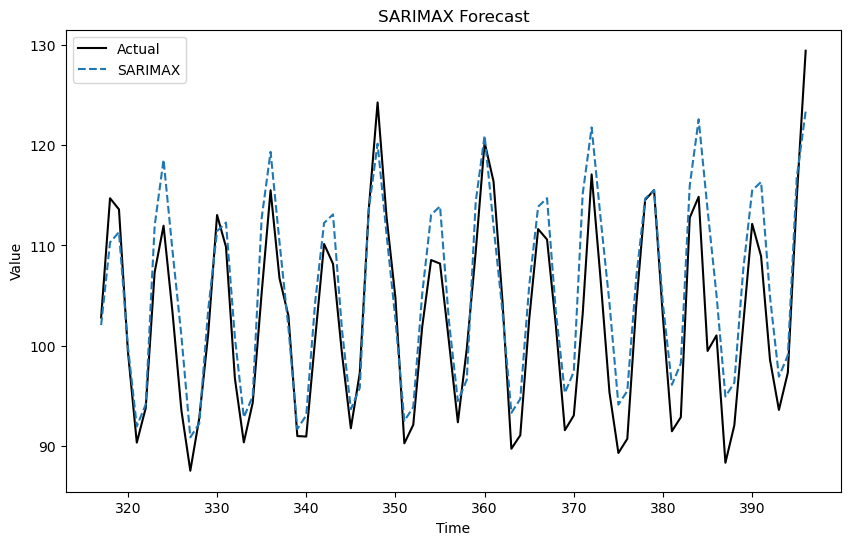

In [6]:
# 3. SARIMAX (with exogenous variable)
exog = np.arange(len(train)).reshape(-1, 1)  # Example exogenous variable
model_sarimax = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=exog)
result_sarimax = model_sarimax.fit()
forecast_sarimax = result_sarimax.forecast(steps=len(test), exog=np.arange(len(test)).reshape(-1, 1))

# Plot SARIMAX results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_sarimax, label='SARIMAX', linestyle='--')
plt.legend()
plt.title('SARIMAX Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


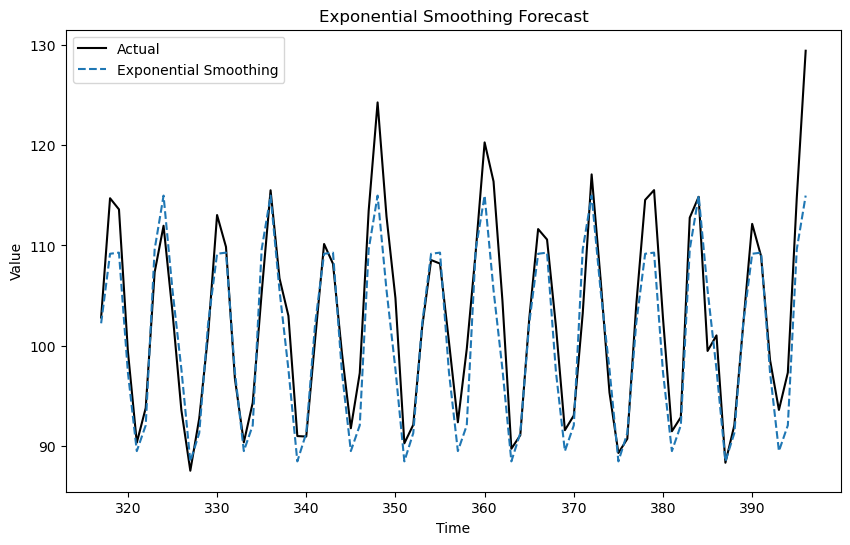

In [7]:
# 4. Exponential Smoothing
model_ets = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
forecast_ets = model_ets.forecast(len(test))

# Plot Exponential Smoothing results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_ets, label='Exponential Smoothing', linestyle='--')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

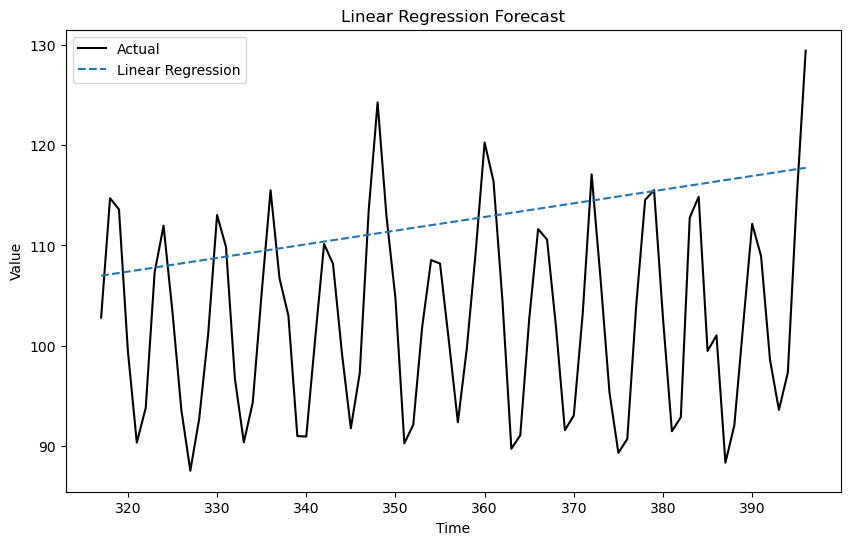

In [8]:
# 5. Linear Regression
X = np.arange(len(train)).reshape(-1, 1)
y = train.values
lr_model = LinearRegression()
lr_model.fit(X, y)
forecast_lr = lr_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))

# Plot Linear Regression results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_lr, label='Linear Regression', linestyle='--')
plt.legend()
plt.title('Linear Regression Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

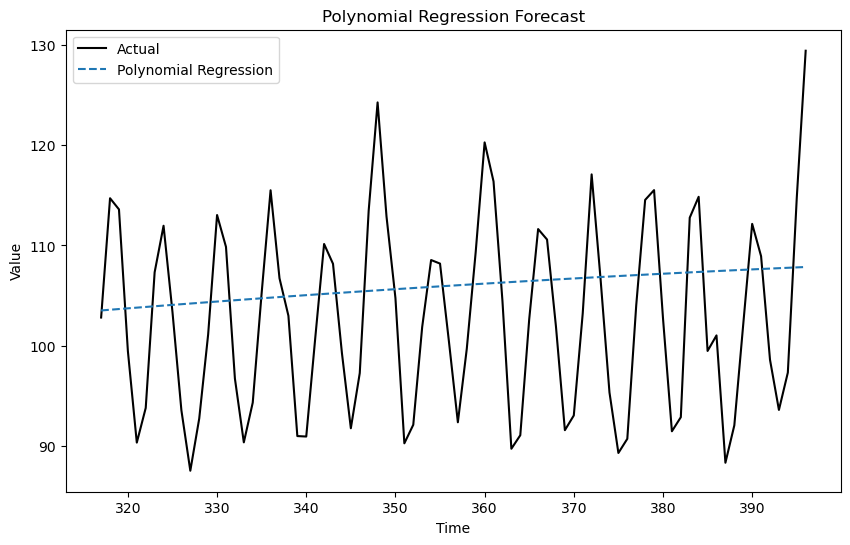

In [9]:
# 6. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
forecast_poly = poly_model.predict(poly.fit_transform(np.arange(len(train), len(train) + len(test)).reshape(-1, 1)))

# Plot Polynomial Regression results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_poly, label='Polynomial Regression', linestyle='--')
plt.legend()
plt.title('Polynomial Regression Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

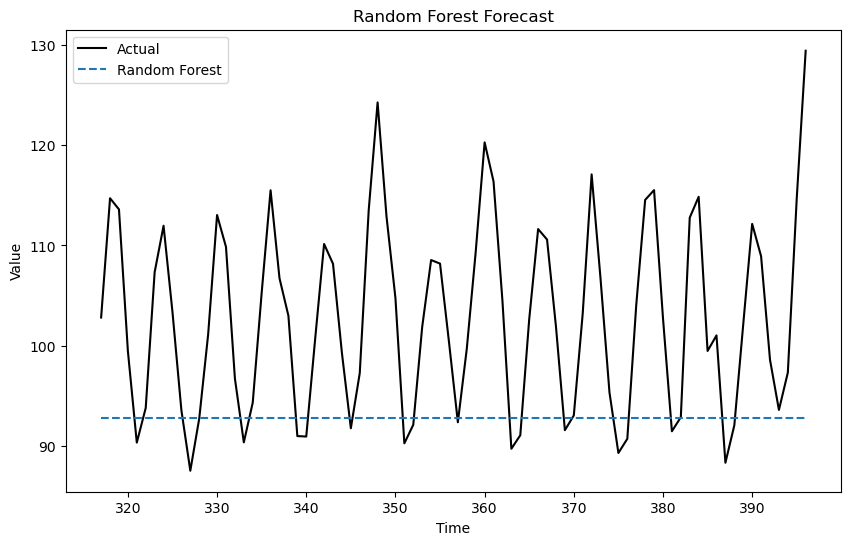

In [10]:
# 7. Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
forecast_rf = rf_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))

# Plot Random Forest results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_rf, label='Random Forest', linestyle='--')
plt.legend()
plt.title('Random Forest Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

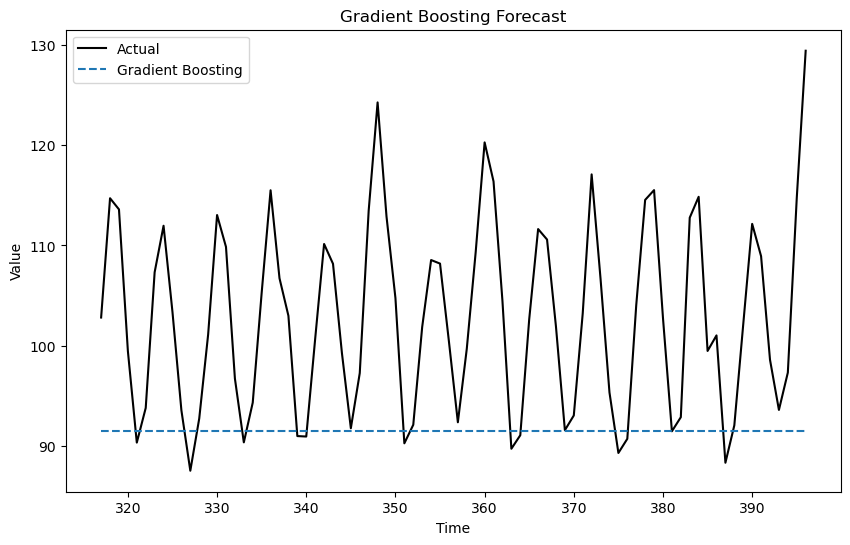

In [11]:
# 8. Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)
forecast_gb = gb_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))

# Plot Gradient Boosting results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_gb, label='Gradient Boosting', linestyle='--')
plt.legend()
plt.title('Gradient Boosting Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

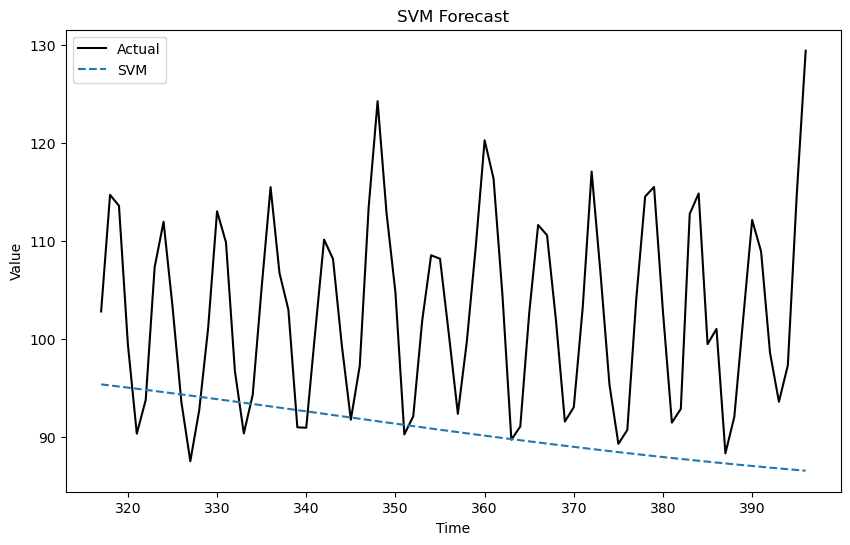

In [12]:
# 9. Support Vector Machines (SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svr_model = SVR()
svr_model.fit(X_scaled, y)
forecast_svr = svr_model.predict(scaler.transform(np.arange(len(train), len(train) + len(test)).reshape(-1, 1)))

# Plot SVM results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_svr, label='SVM', linestyle='--')
plt.legend()
plt.title('SVM Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

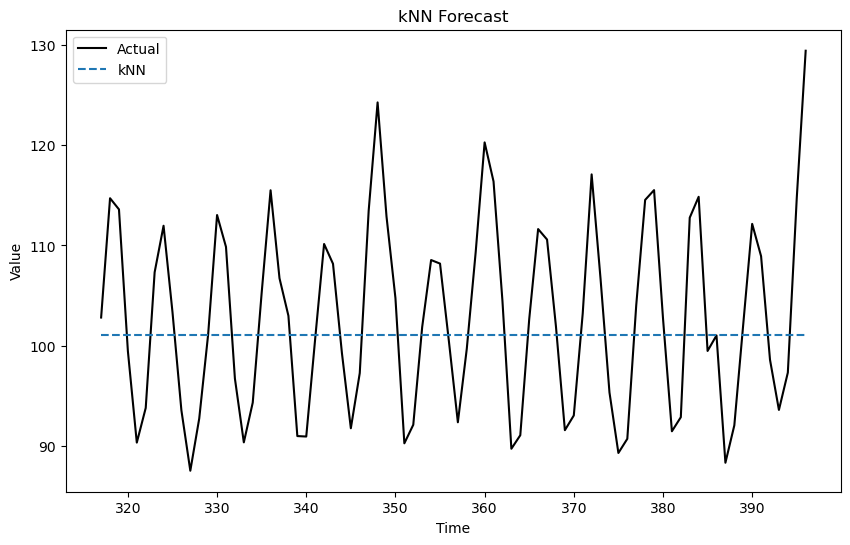

In [13]:
# 10. k-Nearest Neighbors (kNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X, y)
forecast_knn = knn_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))

# Plot kNN results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_knn, label='kNN', linestyle='--')
plt.legend()
plt.title('kNN Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

C:\Users\Satwik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


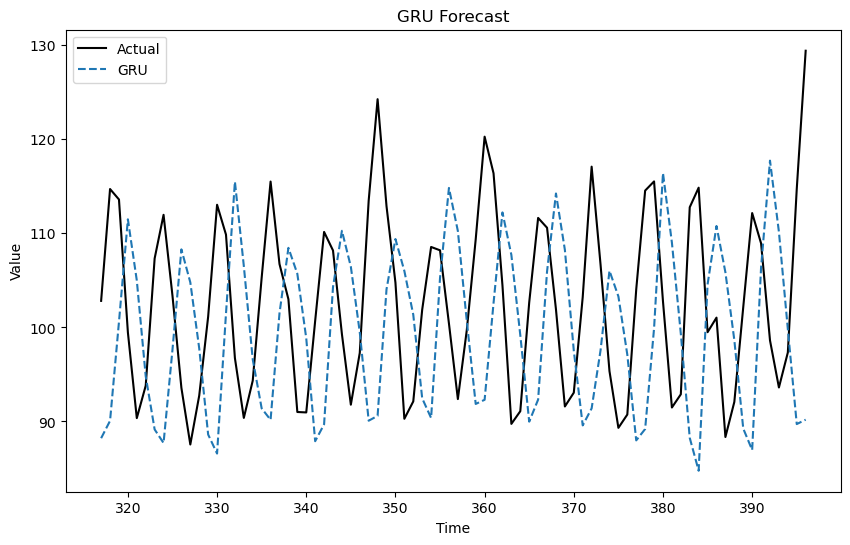

In [16]:
# 11. GRU (Gated Recurrent Unit)
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
X_train, y_train = [], []
for i in range(10, len(train_scaled)):
    X_train.append(train_scaled[i-10:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(GRU(units=50))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, epochs=30, batch_size=8, verbose=0)
forecast_gru = scaler.inverse_transform(model_gru.predict(X_train))[-len(test):, 0]

# Plot GRU results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_gru, label='GRU', linestyle='--')
plt.legend()
plt.title('GRU Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

C:\Users\Satwik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


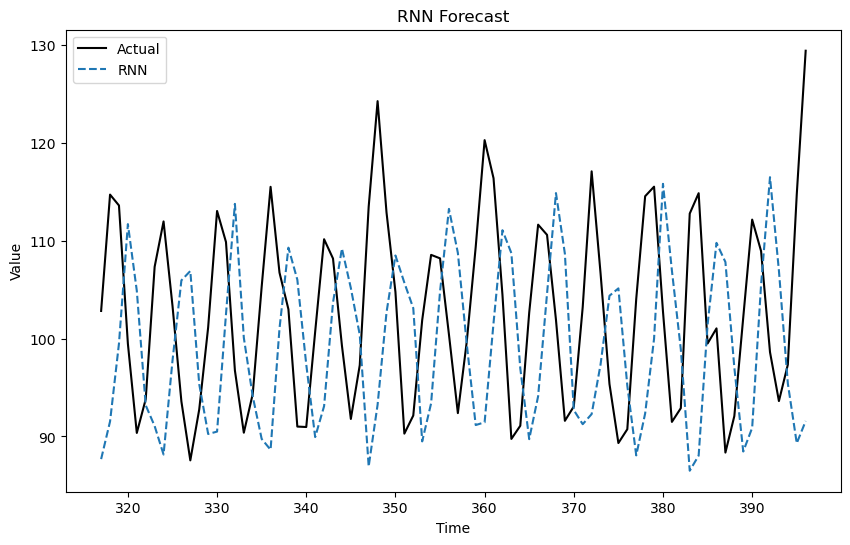

In [17]:

# 12. Vanilla RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(SimpleRNN(units=50))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train, y_train, epochs=10, batch_size=8, verbose=0)
forecast_rnn = scaler.inverse_transform(model_rnn.predict(X_train))[-len(test):, 0]

# Plot RNN results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_rnn, label='RNN', linestyle='--')
plt.legend()
plt.title('RNN Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

C:\Users\Satwik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


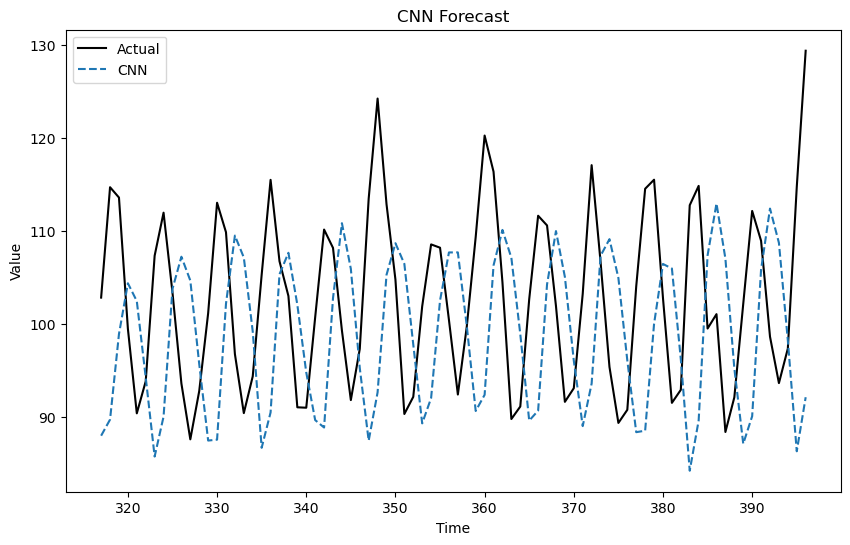

In [18]:
# 13. CNN (Convolutional Neural Network)
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.fit(X_train, y_train, epochs=10, batch_size=4, verbose=0)
forecast_cnn = scaler.inverse_transform(model_cnn.predict(X_train))[-len(test):, 0]

# Plot CNN results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast_cnn, label='CNN', linestyle='--')
plt.legend()
plt.title('CNN Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

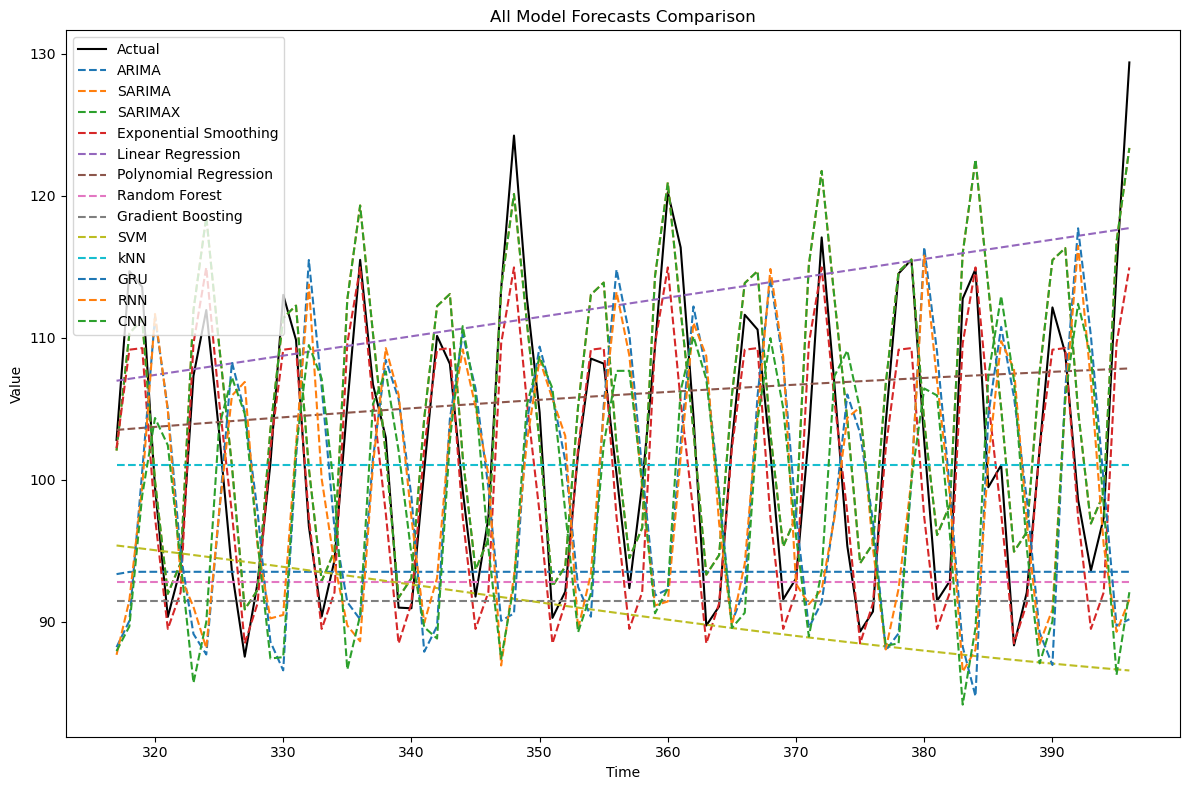

In [19]:
# Plot all results in one figure
plt.figure(figsize=(12, 8))

# Plot each forecast with its label
plt.plot(test.index, test.values, label='Actual', color='black')

# ARIMA
plt.plot(test.index, forecast_arima, label='ARIMA', linestyle='--')

# SARIMA
plt.plot(test.index, forecast_sarima, label='SARIMA', linestyle='--')

# SARIMAX
plt.plot(test.index, forecast_sarimax, label='SARIMAX', linestyle='--')

# Exponential Smoothing
plt.plot(test.index, forecast_ets, label='Exponential Smoothing', linestyle='--')

# Linear Regression
plt.plot(test.index, forecast_lr, label='Linear Regression', linestyle='--')

# Polynomial Regression
plt.plot(test.index, forecast_poly, label='Polynomial Regression', linestyle='--')

# Random Forest
plt.plot(test.index, forecast_rf, label='Random Forest', linestyle='--')

# Gradient Boosting
plt.plot(test.index, forecast_gb, label='Gradient Boosting', linestyle='--')

# SVM
plt.plot(test.index, forecast_svr, label='SVM', linestyle='--')

# kNN
plt.plot(test.index, forecast_knn, label='kNN', linestyle='--')

# GRU
plt.plot(test.index, forecast_gru, label='GRU', linestyle='--')

# RNN
plt.plot(test.index, forecast_rnn, label='RNN', linestyle='--')

# CNN
plt.plot(test.index, forecast_cnn, label='CNN', linestyle='--')

# Customize the plot
plt.legend()
plt.title('All Model Forecasts Comparison')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()  # To avoid overlap of labels
plt.show()